In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import (gradient_descent,
                   read_data,
                   mean_normalization,
                   zscore_normalization)

# Example

## Create Data

In [2]:
x = np.arange(0,20,1)
X = x.reshape(-1,1)

y = X**2

## Plot Data

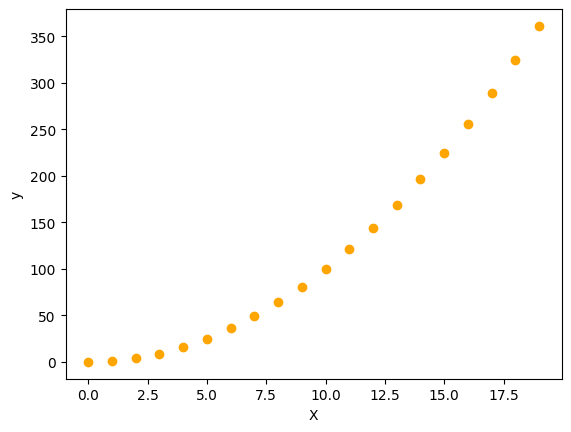

In [3]:
ax = plt.axes()

ax.scatter(X,y,color='orange')

ax.set_xlabel('X')
ax.set_ylabel('y')

plt.show()

Let's assume that the model to fit the data is given by:

$$ f_{\mathbf{w},b}(\mathbf{x}) = w_0 \cdot \mathbf{x} + w_1 \cdot \mathbf{x}^2 + w_2 \cdot \mathbf{x}^3 + b $$

In [4]:
X_train = np.column_stack((X,X**2,X**3))
y_train = y

## Run Gradient Descent

In [25]:
w,b,J_hist = gradient_descent(X_train,y_train,10000,1.0e-7)

## Optimized Parameter Values

In [26]:
print(f'The results of the parameter values:')
print(f'w: {w}, b: {b}')

The results of the parameter values:
w: [0.08237526 0.53552137 0.02752216], b: [0.01056185]


## Cost-Value vs. Iteration

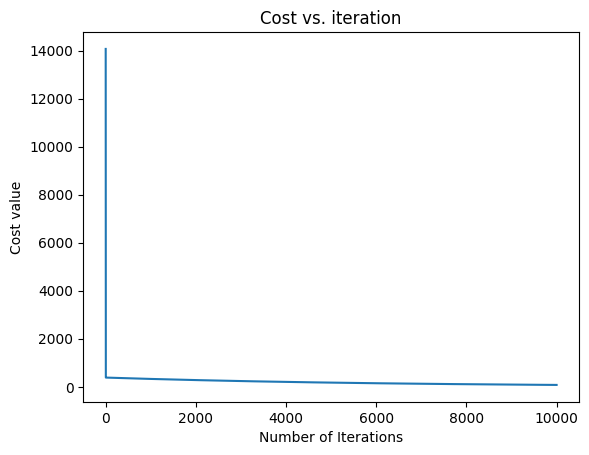

In [27]:
ax = plt.axes()

ax.plot(np.arange(len(J_hist[:])),J_hist[:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration")

plt.show()

In [28]:
y_pred = np.zeros(X_train.shape[0])
for i in range(X_train.shape[0]):
    y_pred[i] = np.dot(w,X_train[i]) + b

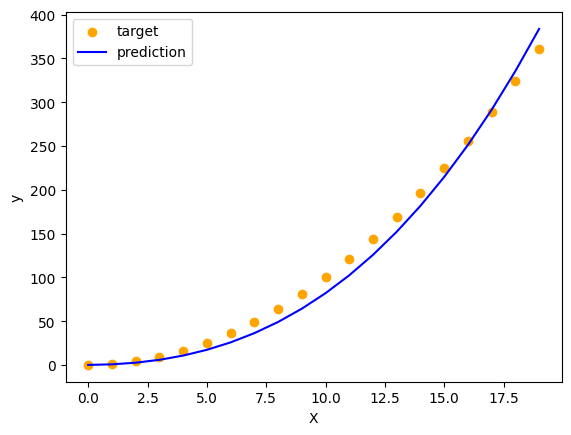

In [29]:
ax = plt.axes()

ax.scatter(X,y,color='orange', label = 'target')
ax.plot(X,y_pred,color='blue', label = 'prediction')

ax.set_xlabel('X')
ax.set_ylabel('y')

plt.legend(loc="upper left")

plt.show()

Prediction function:  

$f_{\mathbf{w},b}(\mathbf{x})$ = {{w[0]}} $\cdot \mathbf{x} +$ {{w[1]}} $\cdot \mathbf{x^2} +$ {{w[2]}} $\cdot \mathbf{x^3} +$ {{b[0]}}

## With Feature Scaling

In [30]:
print(f'Feature value range min, max for X:   [{min(X_train[:,0])}, {max(X_train[:,0])}]')
print(f'Feature value range min, max for X^2: [{min(X_train[:,1])}, {max(X_train[:,1])}]')
print(f'Feature value range min, max for X^3: [{min(X_train[:,2])}, {max(X_train[:,2])}]')

Feature value range min, max for X:   [0, 19]
Feature value range min, max for X^2: [0, 361]
Feature value range min, max for X^3: [0, 6859]


## Z-Score Normalization

In [31]:
X_zscore,mu,sigma = zscore_normalization(X_train)

In [32]:
print(f'Feature value range min, max for X:   [{min(X_zscore[:,0])}, {max(X_zscore[:,0])}]')
print(f'Feature value range min, max for X^2: [{min(X_zscore[:,1])}, {max(X_zscore[:,1])}]')
print(f'Feature value range min, max for X^3: [{min(X_zscore[:,2])}, {max(X_zscore[:,2])}]')

Feature value range min, max for X:   [-1.647508942095828, 1.647508942095828]
Feature value range min, max for X^2: [-1.0881564097149983, 2.0926084802211506]
Feature value range min, max for X^3: [-0.8639661918543327, 2.4191053371921316]


In [33]:
w,b,J_hist = gradient_descent(X_zscore,y_train,100000,1.0e-1)

In [34]:
print(f'The results of the parameter values:')
print(f'w: {w}, b: {b}')

The results of the parameter values:
w: [5.26616826e-05 1.13494579e+02 8.43238778e-05], b: [123.5]


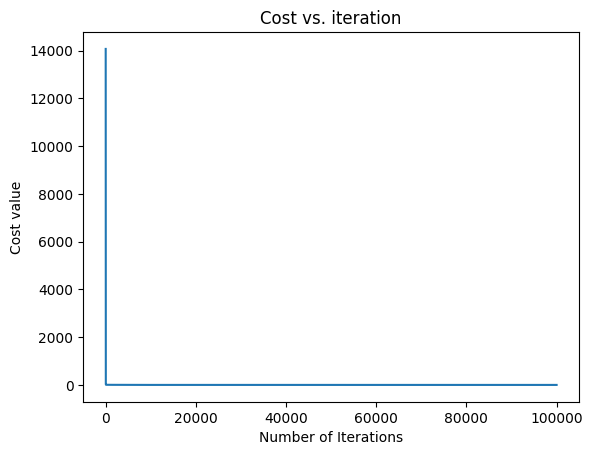

In [35]:
ax = plt.axes()

ax.plot(np.arange(len(J_hist[:])),J_hist[:])

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost value')
ax.set_title("Cost vs. iteration")

plt.show()

In [36]:
y_pred = np.zeros(X_zscore.shape[0])
for i in range(X_zscore.shape[0]):
    y_pred[i] = np.dot(w,X_zscore[i]) + b

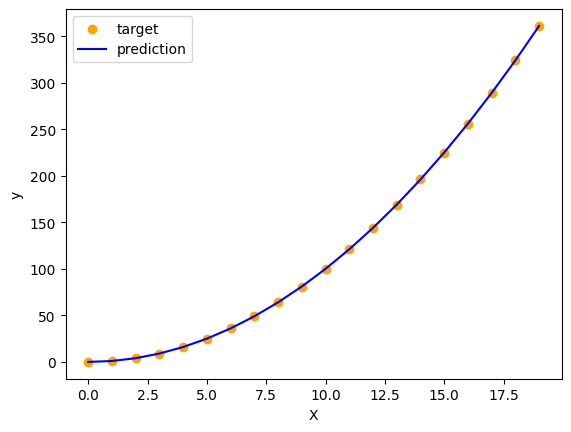

In [37]:
ax = plt.axes()

ax.scatter(X,y,color='orange', label = 'target')
ax.plot(X,y_pred,color='blue', label = 'prediction')

ax.set_xlabel('X')
ax.set_ylabel('y')

plt.legend(loc="upper left")

plt.show()

Prediction function:  

$f_{\mathbf{w},b}(\mathbf{x})$ = {{w[0]}} $\cdot \mathbf{x} +$ {{w[1]}} $\cdot \mathbf{x^2} +$ {{w[2]}} $\cdot \mathbf{x^3} +$ {{b[0]}}